In [38]:
#keeps the information about the experiment

import numpy as np

class data:
    
    const = 10000 #magnetic constant
    
    t = 0 #current time delay
    
    flux_real = 723 #trying to estimate it
    flux_min = 0 #left border
    flux_max = 1000 #right border
    flux_step = 0.01
    
    present = []
    initial = []
    interval = []
    
    repeat = 5
    
    t_min = (np.pi / 2) / (const * (flux_max + flux_min) / 2)
    t_max = (np.pi / 2) / (const * (flux_max + flux_min) / 2) * 1024
    
    n = round((flux_max - flux_min) / flux_step) + 1
    
    def __init__(self):
        data.t = data.t_min
        for i in range(data.n):
            data.present.append(1 / data.n)
            data.initial.append(1 / data.n)
            data.interval.append(data.flux_min + i * data.flux_step)
            
    def double_delay(self):
        data.t *= 2

In [39]:
#returns the state

import numpy as np

def randbin(data, f):
    phi = data.const * f * data.t
    p_0 = (np.sin(phi / 2)) ** 2
    return np.random.choice([0,1], size=(1,1), p=[p_0, 1 - p_0]).reshape(1)[0]

def pstate(data, x, f):
    if x == 0:
        return (np.sin(data.const * f * data.t / 2)) ** 2
    else:
        return (np.cos(data.const * f * data.t / 2)) ** 2

In [43]:
#the bayes theorem

def bayes(data):
    
    #serv = 0
    #for i in range(data.repeat):
    #    serv += randbin(data, data.flux_real)
    #h = round(serv / data.repeat)
    
    h = randbin(data, data.flux_real)
    
    normalization = 0
    
    for i in range(len(data.present)):
        data.present[i] *= pstate(data, h, data.flux_min + i * data.flux_step)
        normalization += data.present[i]
    
    for i in range(len(data.present)):
        data.present[i] /= normalization

In [41]:
#graphics

import numpy as np
import matplotlib.pyplot as plt

def draw_distribution(data):
    
     
    plt.rcParams['figure.figsize'] = [10, 10]
    
    plt.plot(data.interval, data.present, 'o', color = 'b', label = 'current step')
    plt.plot(data.interval, data.initial, 'o', color = 'r', label = 'initial')
    
    plt.title('distribution', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='k', linewidth=1)
    plt.grid(which='minor', color='k', linestyle=':')
    
    plt.show()

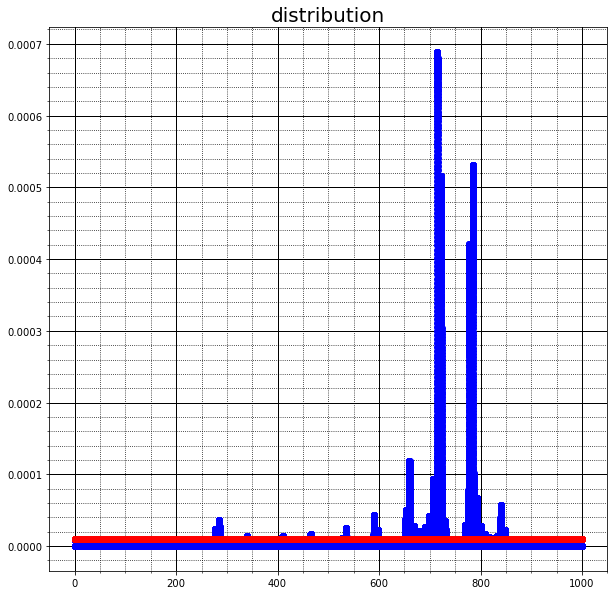

In [ ]:
#main

import numpy as np

experiment = data()

for i in range(int(np.log2(experiment.t_max / experiment.t_min))):
    
    bayes(experiment)
    
    draw_distribution(experiment)
    
    experiment.double_delay()   
    